<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/EDA_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Superstore Sales**

Retail dataset of a global superstore for 4 years.

---

**Importing Required Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Data**

---



In [ ]:
data = pd.read_csv('/content/train.csv')

**Data Information**

---



In [ ]:
data.shape

(9800, 18)

In [ ]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Data Cleaning**

---



_Renaming the columns:

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales'],
      dtype='object')

_Converting columns into appropriate data type:

In [ ]:
data['order date'] = pd.to_datetime(data['order date'], format="%d/%m/%Y")


In [ ]:
data['ship date'] = pd.to_datetime(data['ship date'], format="%d/%m/%Y")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row id         9800 non-null   int64         
 1   order id       9800 non-null   object        
 2   order date     9800 non-null   datetime64[ns]
 3   ship date      9800 non-null   datetime64[ns]
 4   ship mode      9800 non-null   object        
 5   customer id    9800 non-null   object        
 6   customer name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9800 non-null   object        
 9   city           9800 non-null   object        
 10  state          9800 non-null   object        
 11  postal code    9789 non-null   float64       
 12  region         9800 non-null   object        
 13  product id     9800 non-null   object        
 14  category       9800 non-null   object        
 15  sub-category   9800 n

_Checking for presence of any null values:

In [ ]:
data.isnull().any()

row id           False
order id         False
order date       False
ship date        False
ship mode        False
customer id      False
customer name    False
segment          False
country          False
city             False
state            False
postal code       True
region           False
product id       False
category         False
sub-category     False
product name     False
sales            False
dtype: bool

In [ ]:
data[data['postal code'].isna()]

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
data['postal code'] = data['postal code'].fillna(05402.0)

In [ ]:
data['postal code'] = data['postal code'].astype(int)

In [ ]:
data[data['postal code']== 05402.0].head(3)

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
2234,2235,CA-2018-104066,2018-12-05,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5402,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5402,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5402,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75


_Checking for duplicate data if any:

In [ ]:
data.duplicated().any()

False

**Univariet Analysis**

---



_Separating numerical and categorical data:

1. Categoric_feature

In [ ]:
categoric_feature = data[['ship mode','customer name', 'segment', 'country', 'city', 'state', 'region', 'product id', 'category', 'sub-category', 'product name']]

2. Numeric_discrete

In [ ]:
numeric_discrete = data.select_dtypes(include=['int64'])

In [ ]:
numeric_discrete = list(data.select_dtypes(include=['int64']).columns)

In [ ]:
print(numeric_discrete)

['row id', 'postal code']


3. Numeric_continuous

In [ ]:
numeric_continuous = data.select_dtypes(include=['float64'])

In [ ]:
numeric_continuous = list(data.select_dtypes(include=['float64']).columns)

In [ ]:
print(numeric_continuous)

['sales']


_Non-Visual Analysis:

In [ ]:
def discrete_feature(discrete_feature):
  for col in discrete_feature:
    print('*'*5 , col , '*'*5)
    print(discrete_feature[col].agg(['count','nunique','unique']))
    print('value_count: \n', discrete_feature[col].value_counts())
    print()

1. Categoric_feature

In [ ]:
discrete_feature(categoric_feature)

***** ship mode *****
count                                                   9800
nunique                                                    4
unique     [Second Class, Standard Class, First Class, Sa...
Name: ship mode, dtype: object
value_count: 
 Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: ship mode, dtype: int64

***** customer name *****
count                                                   9800
nunique                                                  793
unique     [Claire Gute, Darrin Van Huff, Sean O'Donnell,...
Name: customer name, dtype: object
value_count: 
 William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: customer name, Length: 793, dtype: int64

***** segment *****
count        

Observation:


* Standard class is the most opted ship mode.
* Consumer is the highest segment.
* New York is the highest ordering city.
*	California is the highest ordering state.
*	West is the highest ordering region.
*	Office supplies is the most ordered category.
*	 Binders followed by papers is the most ordered sub-category.
*	Staple envelope, staples and easy-staple paper is the most ordered product.




3. Numeric_continuous

In [ ]:
data['sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: sales, dtype: float64

_Visual Analysis:

<ipython-input-27-decb05c99e4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sales'])


<Axes: xlabel='sales', ylabel='Density'>

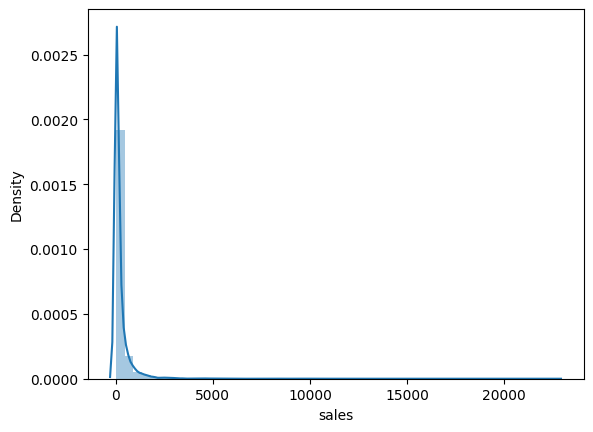

In [ ]:
sns.distplot(data['sales'])

* The sales distribution graph is skewed towards right.

{'whiskers': [<matplotlib.lines.Line2D at 0x7a77070a3b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7a77070a3eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a77070a3820>],
 'medians': [<matplotlib.lines.Line2D at 0x7a77070dc430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a77070dc6d0>],
 'means': []}

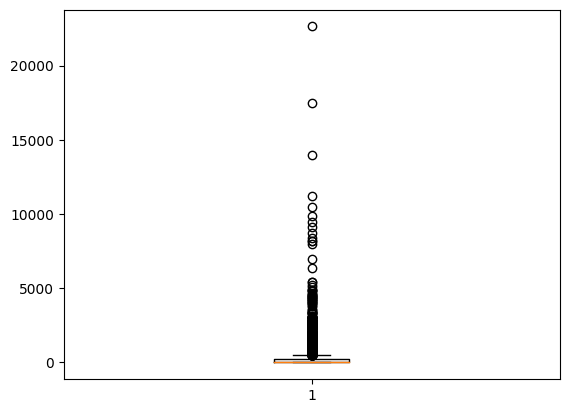

In [ ]:
plt.boxplot(data['sales'])

* As the sales column contains outlier, thus higest value far way from mean will be cutoff.

In [ ]:
data = data[data['sales'] < 15000]

**Bivariate Analysis**

---



**Categorical Data Vs. Categorical Data

In [ ]:
categoric_feature.columns

Index(['ship mode', 'customer name', 'segment', 'country', 'city', 'state',
       'region', 'product id', 'category', 'sub-category', 'product name'],
      dtype='object')

<Axes: xlabel='state'>

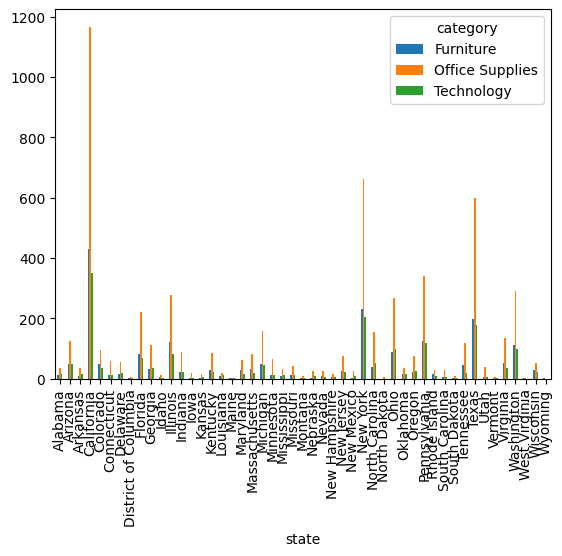

In [ ]:
category_state = pd.crosstab(data['state'],data['category'])
category_state.plot.bar()

* From the state vs. category graph, it is observed that in California office supplies are orderd more followed by New York and Texas.

In [ ]:
category_city = pd.crosstab(data['city'],data['category'])
category_city.sort_values(by='Office Supplies', ascending=False)

category,Furniture,Office Supplies,Technology
city,,,
New York City,187,535,169
Los Angeles,151,432,145
San Francisco,99,317,84
Philadelphia,111,308,113
Seattle,96,248,82
...,...,...,...
Cheyenne,1,0,0
Lehi,0,0,2
Linden,0,0,1


* From category vs. city crosstab, it is observed that office supplies are ordered more in New York city followed by Los Angeles.

In [ ]:
sub_category_state = pd.crosstab(data['state'],data['sub-category'])
sub_category_state_sort = sub_category_state.sort_values(by='Paper',ascending=False)
sub_category_state_sort.head()

sub-category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
state,,,,,,,,,,,,,,,,,
California,143,91,162,267,51,126,15,45,41,184,80,23,281,168,159,41,69
New York,75,43,89,174,32,75,7,30,21,96,44,16,145,106,95,21,28
Texas,79,47,71,151,26,60,5,29,24,78,30,13,145,80,83,19,33
Pennsylvania,44,22,40,98,10,36,5,18,14,64,23,7,64,62,48,12,15
Washington,53,17,34,86,10,34,5,6,15,49,17,7,59,35,48,9,20


* From sub-category vs. state, it is observed that binders are the highest ordered sub-category by California followed by New York.

In [ ]:
sub_category_city = pd.crosstab(data['city'],data['sub-category'])
sub_category_city_sort = sub_category_city.sort_values(by='Paper',ascending=False)
sub_category_city_sort.head()

sub-category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
city,,,,,,,,,,,,,,,,,
New York City,64,35,69,140,29,61,6,21,17,74,36,12,121,87,79,17,23
Los Angeles,55,36,65,93,14,45,7,10,14,62,26,11,116,72,59,13,30
San Francisco,41,24,48,72,16,23,3,15,6,44,21,5,72,35,44,15,16
Philadelphia,43,21,35,87,8,31,5,16,14,57,21,7,61,58,44,9,15
Houston,26,20,25,60,11,26,1,10,9,34,10,6,58,32,32,5,9


From sub-category vs. city, it is observed that binders are the highest ordered sub-category by New York followed by Los Angeles.

<Axes: xlabel='region'>

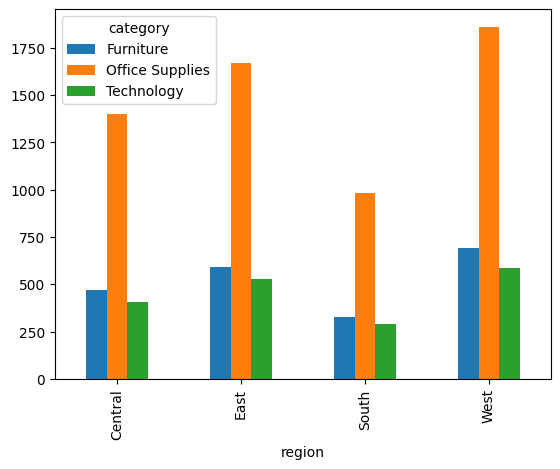

In [ ]:
category_region = pd.crosstab(data['region'],data['category'])
category_region.plot.bar()

* West region orders more office Supplies.

In [ ]:
ship_mode_state = pd.crosstab(data['state'],data['ship mode'])
ship_mode_state_sort = ship_mode_state.sort_values(by='Same Day',ascending=False)
ship_mode_state_sort.head()

ship mode,First Class,Same Day,Second Class,Standard Class
state,,,,
California,314,117,386,1129
New York,172,62,204,659
Ohio,85,52,93,224
Texas,140,48,188,597
Washington,68,39,104,293


* The ship mode for most of the state goes in direction Standard Class>Second Class>First Class>Same Day.

<Axes: xlabel='state'>

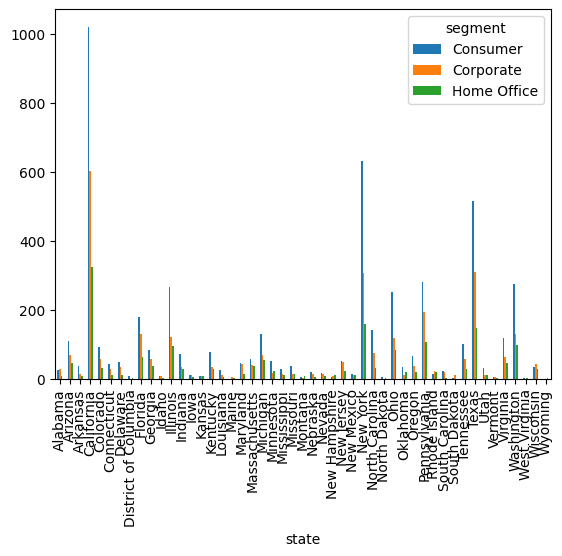

In [ ]:
state_segment = pd.crosstab(data['state'], data['segment'])
state_segment.plot.bar()

* Consumer Segment from California followed by New York and Texas places more orders.

**Numerical Data Vs. Categorical Data

<Axes: xlabel='category'>

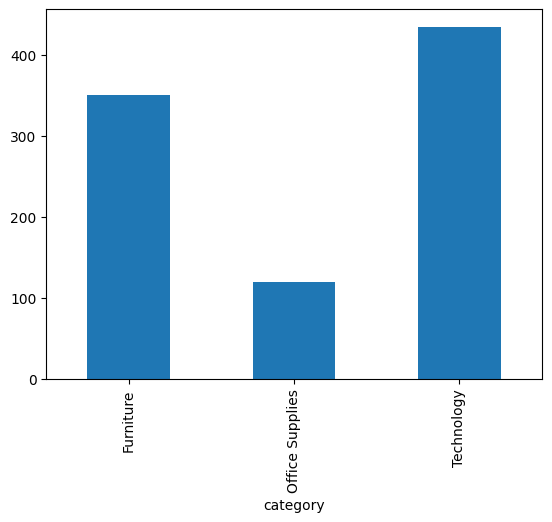

In [ ]:
category_sales = data.groupby(['category'])['sales'].mean()
category_sales.plot.bar()

* The sales of Technology category is more than Furniture and Office supplies.

<Axes: xlabel='sub-category'>

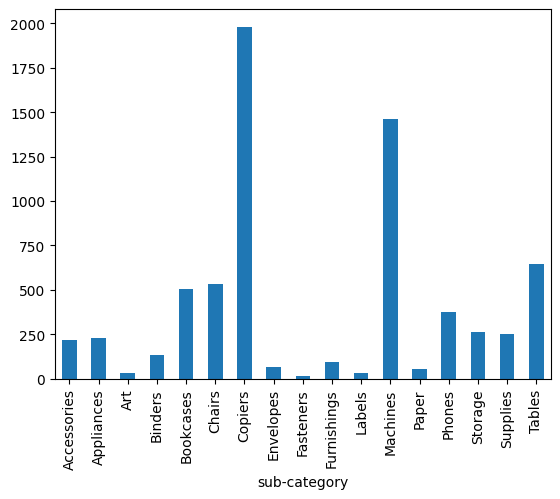

In [ ]:
sub_category_sales = data.groupby(['sub-category'])['sales'].mean()
sub_category_sales.plot.bar()

* Among all the sub-category Copiers followed by Machines and Tables sales are high.

<Axes: xlabel='region'>

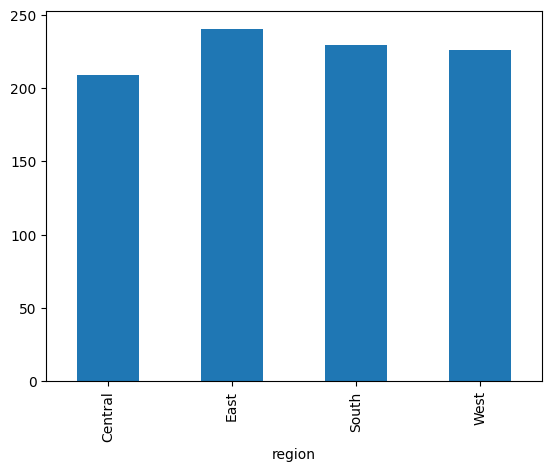

In [ ]:
region_sales = data.groupby(['region'])['sales'].mean()
region_sales.plot.bar()

* The sales of east is high then others.

<Axes: xlabel='state'>

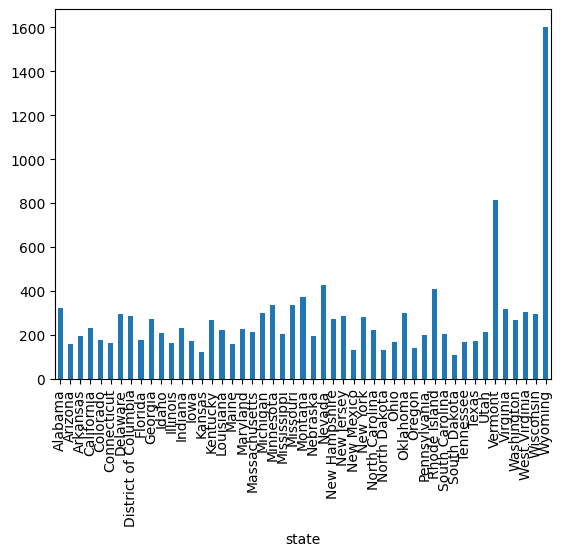

In [ ]:
state_sales = data.groupby(['state'])['sales'].mean()
state_sales.plot.bar()

* Sales of Wyoming sate is high.

In [ ]:
product_sales = data.groupby(['product name'])['sales'].mean()
product_sales.sort = product_sales.sort_values(ascending=False)
product_sales.sort.head()

product name
Canon imageCLASS 2200 Advanced Copier                        11024.968500
Cubify CubeX 3D Printer Triple Head Print                     7999.980000
3D Systems Cube Printer, 2nd Generation, Magenta              7149.945000
HP Designjet T520 Inkjet Large Format Printer - 24" Color     6124.965000
High Speed Automatic Electric Letter Opener                   5676.770667
Name: sales, dtype: float64

* The sales of Canon imageCLASS 2200 Advanced Copier product is high compare to other.

In [ ]:
customer_sales = data.groupby(['customer name'])['sales'].mean()
customer_sales.sort = customer_sales.sort_values(ascending=False)
customer_sales.sort.head()

customer name
Mitch Willingham    1751.292000
Grant Thornton      1558.535333
Tom Ashbrook        1459.562000
Hunter Lopez        1170.299818
Bill Shonely        1166.850333
Name: sales, dtype: float64

In [ ]:
data[data['customer name']=='Mitch Willingham']

,row id,order id,order date,ship date,ship mode,customer id,customer name,segment,country,city,state,postal code,region,product id,category,sub-category,product name,sales
994,995,CA-2015-117639,2015-05-21,2015-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,United States,Virginia Beach,Virginia,23464,South,OFF-BI-10003925,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930
995,996,CA-2015-117639,2015-05-21,2015-05-25,Standard Class,MW-18235,Mitch Willingham,Corporate,United States,Virginia Beach,Virginia,23464,South,TEC-PH-10001530,Technology,Phones,Plantronics Voyager Pro Legend,617.970
3298,3299,CA-2018-136308,2018-11-16,2018-11-16,Same Day,MW-18235,Mitch Willingham,Corporate,United States,San Francisco,California,94122,West,TEC-MA-10000488,Technology,Machines,Bady BDG101FRU Card Printer,1919.976


* Mitch Willingham is the high sale giving customer from corporate segment.

In [ ]:
order_sales = data.groupby(['order date'])['sales'].mean()
order_sales.sort = order_sales.sort_values(ascending=False)
order_sales.sort.head()

order date
2016-01-28    4297.6440
2018-07-24    2399.9600
2018-03-23    1852.0085
2015-05-08    1799.9700
2017-02-02    1799.3568
Name: sales, dtype: float64

In [ ]:
data['year'] = pd.to_datetime(data['order date']).dt.year
data['month'] = pd.to_datetime(data['order date']).dt.month

<Axes: xlabel='year'>

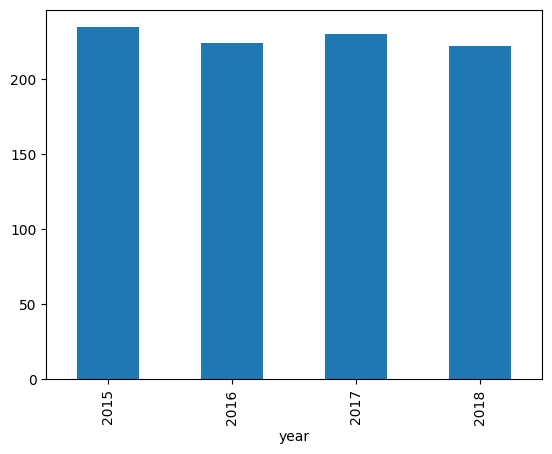

In [ ]:
order_sales_year = data.groupby(['year'])['sales'].mean()
order_sales_year_sort = order_sales.sort_values(ascending=False)
order_sales_year.plot.bar()

* From 2015 to 2018 the sales are almost same.

<Axes: xlabel='month'>

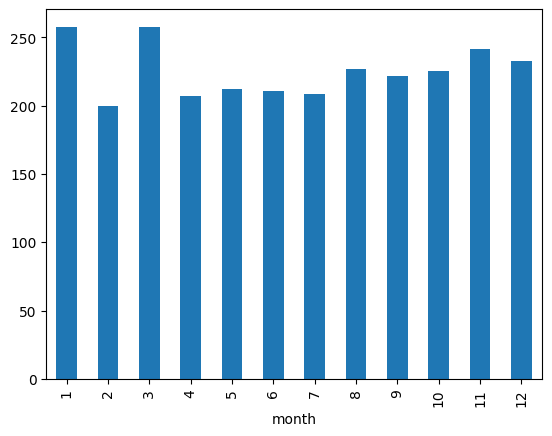

In [ ]:
order_sales_month = data.groupby(['month'])['sales'].mean()
order_sales_month_sort = order_sales.sort_values(ascending=False)
order_sales_month.plot.bar()

* High sales are observed in month of January and March with not much difference with rest of the months.

<Axes: xlabel='segment'>

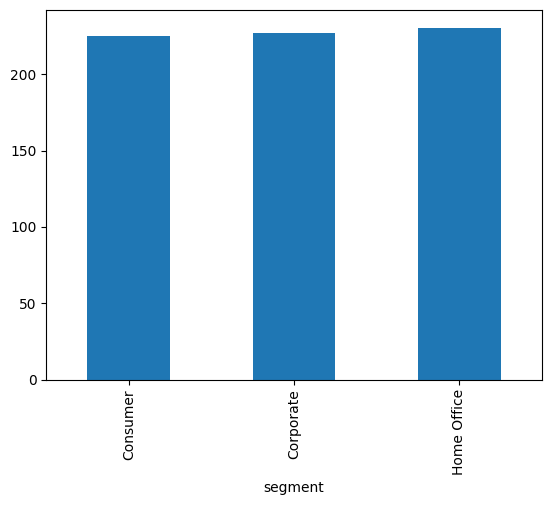

In [ ]:
segment_sales = data.groupby(['segment'])['sales'].mean()
segment_sales.plot.bar()

* Segment wise the sales are almost same.

**Overall Observations**

---
* Standard class is the most opted ship mode.
* Consumer is the highest segment.
* New York is the highest ordering city.
* California is the highest ordering state.
* West is the highest ordering region.
* Office supplies is the most ordered category.
* Binders followed by papers is the most ordered sub-category.
* Staple envelope, staples and easy-staple paper is the most ordered product.


---


* From the state vs. category graph, it is observed that in California office supplies are orderd more followed by New York and Texas.
* From category vs. city crosstab, it is observed that office supplies are ordered more in New York city followed by Los Angeles.
* From sub-category vs. state, it is observed that binders are the highest ordered sub-category by California followed by New York.
* From sub-category vs. city, it is observed that binders are the highest ordered sub-category by New York followed by Los Angeles.
* West region orders more office Supplies.
* The ship mode for most of the state goes in direction Standard Class>Second Class>First Class>Same Day.
* Consumer Segment from California followed by New York and Texas places more orders.
* The sales of Technology category is more than Furniture and Office supplies.
* Among all the sub-category Copiers followed by Machines and Tables sales are high.
* The sales of east is high then others.
* Sales of Wyoming sate is high.
* The sales of Canon imageCLASS 2200 Advanced Copier product is high compare to other.
* From 2015 to 2018 the sales are almost same.
* High sales are observed in month of January and March with not much difference with rest of the months.
* Segment wise the sales are almost same.





**Conclusion**

---
* California and New York orders more Office Supplies.
* The sales of Technology category is more than furniture and office supplies.
* Thus, Wyoming state number of orders are less but still gave high sales.
* Overall from year 2015 to 2018 sales are same. Also, month or season does not influence the sales much.





---

